## Boston Dataset

In [273]:
# import the load_boston() function from sklearn.datasets
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
# print(boston.DESCR)

# create a dataframe object out of the data.  
# Use boston.data for the data, and pass boston.feature_names 
# for the columns parameter
df = pd.DataFrame(boston.data, columns=boston.feature_names)

# the MEDV data in boston.target is the y variable
df["MEDV"] = boston.target # MEDV, median value of home

C:\Users\benpu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [274]:
print(df.columns)
df.drop(columns="B",inplace=True) # removing the problematic feature
df.dropna(inplace=True)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [275]:
corr_df = df.corr()
corr_df.style.background_gradient(cmap='bwr').set_precision(2)

C:\Users\benpu\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,0.54,-0.47


* Which features are highly correlated with our target variable?
    * RM is possitively correlated (0.70)
    * LSAT is negatively correlated (-0.74)
* Which features are not correlated with our target variable?
    * CHAH (0.18)
    * DIS (0.25)

## ML models

In [276]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# x1 = df[0:df.columns.size - 1]
x1 = df.drop(columns="MEDV")
print(x1)
y1 = df["MEDV"]


X_train, X_test, y_train, y_test = train_test_split(x1, y1, random_state=0, test_size=0.25) # 25% reserved, and random state of 0
print(X_test)
print(y_test)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO  LSTAT  
0       15.3   4.98  
1       17.8   9.14  
2       17.8   4.03  
3       18.

In [277]:
import scipy.stats as stats
from sklearn import linear_model

m,b,r,p_val,std_err = stats.linregress(x1.index,y1)
print("m:",m,"b:",b,"r:",r)

m: -0.01425375776579459 b: 26.13188015997381 r: -0.2266036429353401


In [278]:
from sklearn.linear_model import LinearRegression
import numpy as np

# make a prediction for unseen x
predicted_y = []

reg = LinearRegression()
# before we call fit we need to reshape the data
#X = np.reshape(x1,(-1,1)) # -1 grabs the dimention of x (num or rows), results with a 100x1 matrix
reg.fit(x1,y1) # needs X to be a matrix
for i in range(len(X_test.index)):
    y_predicted = reg.predict([X_test.iloc[i]]) 
    predicted_y.append(y_predicted[0])


predicted_y_df = pd.Series(predicted_y,dtype=float)


# print((predicted_y_df))
predicted_y_np = predicted_y_df.to_numpy()
print(predicted_y_np)

[24.28758127 24.56172871 29.7215753  11.87446052 21.15826976 19.29854778
 20.67281902 21.42823263 18.8729942  22.7570127   7.84209989 19.24044364
 17.4130874   4.91094167 40.49736832 31.96333873 22.77041185 36.03691334
 30.68105609 23.07938508 24.83301905 24.4652428  20.72416707 30.31007898
 22.08532214 12.82666462 17.63469278 17.93997867 35.75448863 20.43148278
 18.4488214  17.60628756 20.00437518 23.660733   29.06311055 19.93456612
 10.49892814 25.95754857 20.17178196 15.99239285 25.62968965 20.28694959
 21.70456362 16.05102789 21.97616043 25.05683368 19.30674937 22.57833566
  7.87359254 24.49866791 22.41762004 16.48770678 24.51111139 29.54468588
 14.19079769 20.60745482 19.92667289 14.98044611 17.75005096 22.43439864
 16.85249263 21.12155145 32.656176   31.24012589 17.70187712 32.47619211
 18.78845003 18.62438629 20.79406086 22.52568884 23.03803615 23.95908755
 30.37899322 28.48693981 26.47357803  4.23983611 37.05715456 23.54902664
 27.19109696 18.87317724 28.44360171 19.05743765 19

C:\Users\benpu\anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\benpu\anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\benpu\anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\benpu\anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\benpu\anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature n

127
127


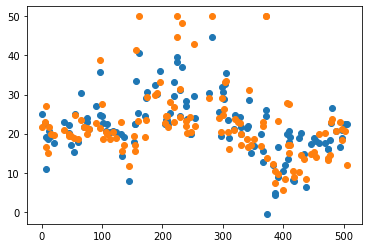

In [279]:
import matplotlib.pyplot as plt

print(X_test.index.size)
print(predicted_y_np.size)
plt.figure()
plt.scatter(X_test.index,predicted_y_np)
plt.scatter(X_test.index,y_test)
plt.show()

In [280]:
print("R^2 is",r*r)

R^2 is 0.05134921099156711


## Removing specific attributes to improve r val

In [281]:
def get_r_val(df1):    
    # x1 = df[0:df.columns.size - 1]
    x1 = df1.drop(columns="MEDV")
    y1 = df1["MEDV"]

    m,b,r,p_val,std_err = stats.linregress(x1.index,y1)
    print("m:",m,"b:",b,"r:",r)
    return r

In [282]:
df.drop(columns=["CRIM"],inplace=True)
print(get_r_val(df))

m: -0.01425375776579459 b: 26.13188015997381 r: -0.2266036429353401
-0.2266036429353401
